# Análisis iPhone

El objetivo del presente proyecto es realizar una comparativa de las diferentes versiones de iPhone, y cómo ha variado la percepción del público a través de los años

# Web Scraping

Esta información fue obtenida a traves de scraping a la página web: http://socialcompare.com/en/comparison/apple-iphone-product-line-comparison

Mediante un spider de Scrapy se seleccionó las datos más relevantes y se almacenaron en un archivo csv. Posteriormente este archivo fue importado a un dataframe de Pandas.

In [71]:
import pandas as pd
df_iphone = pandas.read_csv('../scrapy/iphone.csv')
df_iphone = df_iphone.sort_values('fecha')
df_iphone = df_iphone.reset_index(drop=True)
df_iphone

,modelo,pulgadas_pantalla,resolucion_camara,ram,bateria,almacenamiento,fecha
0,iPhone 3GS,3.5,3,0.256,1219,32,2009-06-19
1,iPhone 4,3.5,5,0.512,1420,32,2010-06-24
2,iPhone 4S,3.5,8,1.000,1432,64,2011-10-14
3,iPhone 5,4.0,8,1.000,1440,64,2012-09-21
4,iPhone 5C,4.0,8,1.000,1507,32,2013-09-10
5,iPhone 5S,4.0,8,1.000,1570,64,2013-09-10
6,iPhone 6,4.7,8,1.000,1810,128,2014-09-09
7,iPhone 6 Plus,5.5,8,1.000,2915,128,2014-09-09
8,iPhone 6s,4.7,12,2.000,1715,128,2015-09-12
9,iPhone 6s Plus,5.5,12,2.000,2750,128,2015-09-12


In [10]:
import matplotlib.pyplot as plt
import numpy as np

In [33]:
pv_primeros= df_iphone.filter(items = ["modelo", "ram"]).sort_values('ram', ascending=False).head(10)

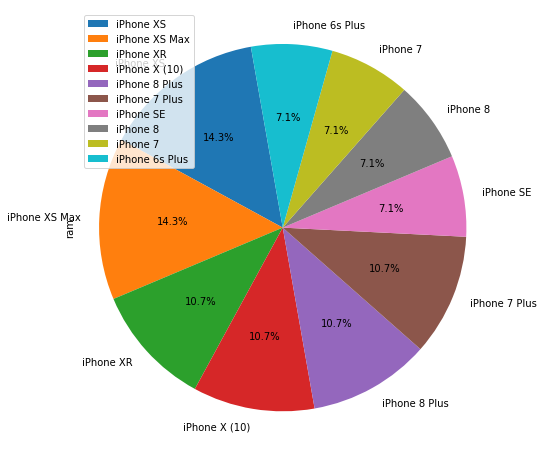

In [34]:
plt.figure(figsize=(16,8))
# plot chart
ax1 = plt.subplot(121, aspect='equal')

pv_primeros.plot(kind='pie', y = 'ram', ax=ax1, autopct='%1.1f%%', 
 startangle=100, shadow=False, labels=pv_primeros['modelo'], fontsize=10)
plt.axis('equal')

# View the plot
plt.show()

# Precios

Adicionalmente se obtuvo el precio de venta inicial de cada iPhone, ajustado a la inflación. A partir de un csv: https://www.reddit.com/r/dataisbeautiful/comments/9vak24/the_cost_of_each_iphone_at_launch_adjusted_for/

In [36]:
df_precio = pandas.read_csv('precio_iphone.csv')
df_precio

,unit,year,price
0,iPhone 3GS,2009,700
1,iPhone 4,2010,692
2,iPhone 4S,2011,722
3,iPhone 5,2012,708
4,iPhone 5C,2013,584
5,iPhone 5S,2013,700
6,iPhone 6,2014,688
7,iPhone 6 Plus,2014,784
8,iPhone 6S,2015,689
9,iPhone 6S Plus,2015,783


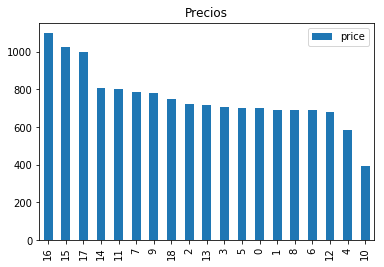

In [43]:
pvp = df_precio.filter(items = ["unit","price"]).sort_values('price', ascending=False)
pvp.plot(kind="bar",title="Precios")

In [44]:
df_iphone['precio'] = df_precio['price']
df_iphone

,modelo,pulgadas_pantalla,resolucion_camara,ram,bateria,almacenamiento,fecha,precio
0,iPhone 3GS,3.5,3,0.256,1219,32,2009-06-19,700
1,iPhone 4,3.5,5,0.512,1420,32,2010-06-24,692
2,iPhone 4S,3.5,8,1.000,1432,64,2011-10-14,722
3,iPhone 5,4.0,8,1.000,1440,64,2012-09-21,708
4,iPhone 5C,4.0,8,1.000,1507,32,2013-09-10,584
5,iPhone 5S,4.0,8,1.000,1570,64,2013-09-10,700
6,iPhone 6,4.7,8,1.000,1810,128,2014-09-09,688
7,iPhone 6 Plus,5.5,8,1.000,2915,128,2014-09-09,784
8,iPhone 6s,4.7,12,2.000,1715,128,2015-09-12,689
9,iPhone 6s Plus,5.5,12,2.000,2750,128,2015-09-12,783


(0, 1200)

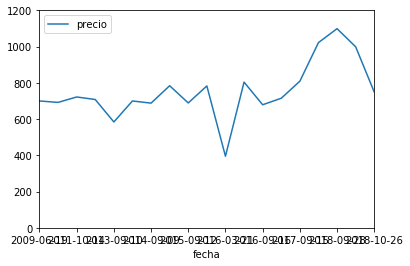

In [61]:
plot = df_iphone.plot(x='fecha',y='precio')
plot.set_ylim(0, 1200)

Medante scrapy obtenemos el conteo de cuentas de la pagina principal en un archivo json.

In [77]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sqlite3

In [85]:
datos = pd.read_json('../Scrapy/data/datos.json')

In [86]:
datos_parcial = datos[datos['name'] != 'Total Accounts']

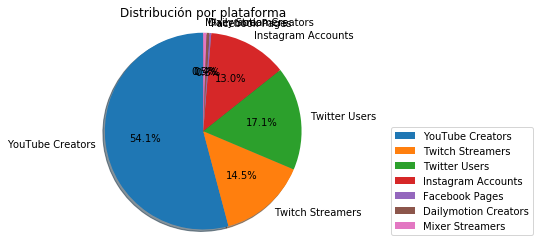

In [143]:
labels = datos_parcial['name']
sizes = datos_parcial['value']
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)
ax1.axis('equal') 
plt.legend(loc="lower right", bbox_to_anchor=(1.5, 0))
plt.title('Distribución por plataforma')
plt.show()

# Resultado
Se puede dividir a las platformas en en tres grupos, el primero que contiene la plataforma de YouTube que es la mas usada para crear contenidos, el segundo que contiene sitios similares en uso com lo son Twitch, Twitter e Instagram y el tercer grupo con poco conteo de cuentas como Facebook, Dailymotion y Stremers

In [100]:
# Youtube
youtubetop100 = pd.read_json('../Scrapy/data/youtube_top100.json')
youtubetop100.head()

,grade,rank,subs,uploads,uri,username,views
0,A++,1,84165304,13103,https://socialblade.com/youtube/c/tseriesmusic,T-Series,61057139207
1,A++,2,35856476,398,https://socialblade.com/youtube/c/cocomelon,Cocomelon - Nursery Rhymes,19388551809
2,A++,3,1230286,2651,https://socialblade.com/youtube/c/ hkcinema,HKCinema,718966136
3,A++,4,41275374,28774,https://socialblade.com/youtube/c/set-india,SET India,28573512222
4,A++,5,1492793,121,https://socialblade.com/youtube/c/posteries,Posteries,675657643


# Twitch

In [99]:
twitchtop100 = pd.read_json('../Scrapy/data/twitch-top100.json')
twitchtop100.head()

,grade,rank,subs,uri,username,views
0,A++,1,13295895,https://socialblade.com/twitch/user/ninja,ninja,410947464
1,A++,2,5304272,https://socialblade.com/twitch/user/shroud,shroud,268289375
2,A++,3,4908770,https://socialblade.com/twitch/user/meclipse,meclipse,242068259
3,A++,4,4845251,https://socialblade.com/twitch/user/tsm_myth,tsm_myth,70366867
4,A++,5,4834461,https://socialblade.com/twitch/user/tfue,tfue,83990775


# Twitter

In [101]:
twittertop100 = pd.read_json('../Scrapy/data/twitter-top100.json')
twittertop100.head()

,follow,grade,rank,subs,uploads,uri,username
0,215,A++,1,106882074,9364,https://socialblade.com/twitter/user/katyperry,katyperry
1,298906,A++,2,104997556,30501,https://socialblade.com/twitter/user/justinbieber,justinbieber
2,615997,A++,3,104516135,15576,https://socialblade.com/twitter/user/BarackObama,BarackObama
3,1090,A++,4,89373655,10236,https://socialblade.com/twitter/user/rihanna,rihanna
4,0,A++,5,83335148,103,https://socialblade.com/twitter/user/taylorswi...,taylorswift13


# Instagram

In [102]:
instagramtop100 = pd.read_json('../Scrapy/data/instagram-top100.json')
instagramtop100.head()

,follow,grade,rank,subs,uploads,uri,username
0,342,A++,1,131145432,4070,https://socialblade.com/instagram/user/therock,therock
1,940,A++,2,110952719,4384,https://socialblade.com/instagram/user/neymarjr,EneJota
2,222,A++,3,108650319,413,https://socialblade.com/instagram/user/leomessi,Leo Messi
3,135,A++,4,99489262,19414,https://socialblade.com/instagram/user/natgeo,National Geographic
4,1089,A++,5,86060066,2654,https://socialblade.com/instagram/user/jlo,Jennifer Lopez


Se agrega la columna "origen" a cada Dataframe:

In [104]:
youtubetop100['origen'] = 'YouTube'
twitchtop100['origen'] = 'Twitch'
twittertop100['origen'] = 'Twitter'
instagramtop100['origen'] = 'Instagram'

Obtenemos una tabla general con todos los datos:

In [105]:
db = pd.concat([youtubetop100, twitchtop100, twittertop100, instagramtop100], sort=False)
db.head()

,grade,rank,subs,uploads,uri,username,views,origen,follow
0,A++,1,84165304,13103.0,https://socialblade.com/youtube/c/tseriesmusic,T-Series,6.105714e+10,YouTube,NaN
1,A++,2,35856476,398.0,https://socialblade.com/youtube/c/cocomelon,Cocomelon - Nursery Rhymes,1.938855e+10,YouTube,NaN
2,A++,3,1230286,2651.0,https://socialblade.com/youtube/c/ hkcinema,HKCinema,7.189661e+08,YouTube,NaN
3,A++,4,41275374,28774.0,https://socialblade.com/youtube/c/set-india,SET India,2.857351e+10,YouTube,NaN
4,A++,5,1492793,121.0,https://socialblade.com/youtube/c/posteries,Posteries,6.756576e+08,YouTube,NaN


# Conexión a la Base de Datos

In [111]:
with sqlite3.connect('socialblade.db') as conexion:
    cur = conexion.cursor()
    cur.execute("DROP TABLE IF EXISTS accounts")
    db.to_sql('accounts', conexion, if_exists='append')

In [112]:
df_read = pd.read_sql_query("SELECT * FROM accounts", conexion)
df_read.head()

,index,grade,rank,subs,uploads,uri,username,views,origen,follow
0,0,A++,1,84165304,13103.0,https://socialblade.com/youtube/c/tseriesmusic,T-Series,6.105714e+10,YouTube,NaN
1,1,A++,2,35856476,398.0,https://socialblade.com/youtube/c/cocomelon,Cocomelon - Nursery Rhymes,1.938855e+10,YouTube,NaN
2,2,A++,3,1230286,2651.0,https://socialblade.com/youtube/c/ hkcinema,HKCinema,7.189661e+08,YouTube,NaN
3,3,A++,4,41275374,28774.0,https://socialblade.com/youtube/c/set-india,SET India,2.857351e+10,YouTube,NaN
4,4,A++,5,1492793,121.0,https://socialblade.com/youtube/c/posteries,Posteries,6.756576e+08,YouTube,NaN


In [113]:
uris = df_read['uri'].values[:3]

In [114]:
uris

array(['https://socialblade.com/youtube/c/tseriesmusic',
       'https://socialblade.com/youtube/c/cocomelon',
       'https://socialblade.com/youtube/c/\xa0hkcinema\xa0'], dtype=object)

A partir de cada pagina se desea obtener datos que no se obtuvieron de las tablas anteriormente obtenidas:

    Username
    País
    Categoría
    Promedio de subscriptores diarios
    Promedio de subscriptores mensuales
    Promedio de visitas diarias
    Promedio de visitas mensuales
    Ganancias mensuales
    Fecha de inicio
    Twitter

In [115]:
accounts_data = pd.read_json('../Scrapy/data/accounts_data.json')
accounts_data.head()

,category,country,earnings_daily,earnings_monthly,start_date,subscribers_daily,subscribers_monthly,twitter,username,views_daily,views_monthly
0,Music,IN,24000.0,719100.0,Mar 13 2006,163190,4895678,https://www.twitter.com/tseries,T-Series,95883900,2876517000
1,Education,US,22000.0,660400.0,Sep 1 2006,133535,4006035,https://twitter.com/abckidtv,Cocomelon - Nursery Rhymes,88056400,2641692000
2,Entertainment,MX,9500.0,283500.0,Oct 14 2014,97416,2922476,https://twitter.com/badabunoficial,Badabun,37801300,1134039000
3,NaN,US,9300.0,280000.0,Apr 23 2018,82512,2475344,NaN,Vlad and Nikita,37337000,1120110000
4,Entertainment,US,7900.0,238200.0,May 12 2015,86818,2604514,NaN,✿ Kids Diana Show,31756700,952701000


Se guarda estos datos en base de datos:

In [116]:
with sqlite3.connect('socialblade.db') as conexion:
    cur = conexion.cursor()
    cur.execute("DROP TABLE IF EXISTS stats")
    accounts_data.to_sql('stats', conexion, if_exists='append')

In [117]:
complete = pd.merge(df_read, accounts_data, on='username')
complete.head()

,index,grade,rank,subs,uploads,uri,username,views,origen,follow,category,country,earnings_daily,earnings_monthly,start_date,subscribers_daily,subscribers_monthly,twitter,views_daily,views_monthly
0,0,A++,1,84165304,13103.0,https://socialblade.com/youtube/c/tseriesmusic,T-Series,6.105714e+10,YouTube,NaN,Music,IN,24000.0,719100.0,Mar 13 2006,163190,4895678,https://www.twitter.com/tseries,95883900,2876517000
1,1,A++,2,35856476,398.0,https://socialblade.com/youtube/c/cocomelon,Cocomelon - Nursery Rhymes,1.938855e+10,YouTube,NaN,Education,US,22000.0,660400.0,Sep 1 2006,133535,4006035,https://twitter.com/abckidtv,88056400,2641692000
2,3,A++,4,41275374,28774.0,https://socialblade.com/youtube/c/set-india,SET India,2.857351e+10,YouTube,NaN,Entertainment,IN,12400.0,371600.0,Sep 20 2006,72106,2163159,https://twitter.com/sonyliv,49547100,1486413000
3,4,A++,5,1492793,121.0,https://socialblade.com/youtube/c/posteries,Posteries,6.756576e+08,YouTube,NaN,NaN,US,169.0,5100.0,Feb 1 2017,1587,47598,https://twitter.com/posterieslol,676690,20300700
4,5,A++,6,13588021,83.0,https://socialblade.com/youtube/channel/UCvlE5...,Vlad and Nikita,4.033827e+09,YouTube,NaN,NaN,US,9300.0,280000.0,Apr 23 2018,82512,2475344,NaN,37337000,1120110000


# YouTube: Identificar los tipos de canales mas populares

In [120]:
df_youtube = complete[complete['origen'] == 'YouTube']
serie_youtube = df_youtube['category']
counts_youtube_categories = serie_youtube.value_counts()
counts_youtube_categories.keys()

Index(['Music', 'Entertainment', 'People', 'Education', 'Film', 'Comedy',
       'Games', 'Tech', 'Howto'],
      dtype='object')

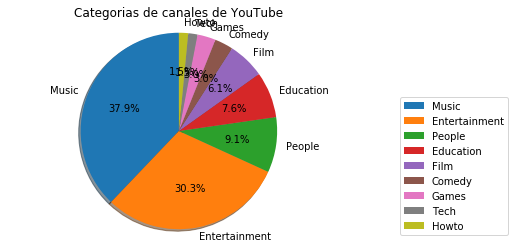

In [121]:
labels = counts_youtube_categories.keys()
sizes = counts_youtube_categories.values
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.legend(loc="lower right", bbox_to_anchor=(1.5, 0))
plt.title('Categorias de canales de YouTube')
plt.show()

# YouTube: Obtener la distribucion de frecuencias de ganancias de canales

Para representar las distribuciones usaremos histogramas para representar las frecuencias de las ganacias diaria y mensual de los canales de YouTube

In [124]:
df_youtube = complete[complete['origen'] == 'YouTube']

# Histograma para las ganancias diarias

In [125]:
serie_youtube_daily_earnings = df_youtube['earnings_daily'].fillna(0)
serie_youtube_daily_earnings.replace('NaN', 0).head()

0    24000.0
1    22000.0
2    12400.0
3      169.0
4     9300.0
Name: earnings_daily, dtype: float64

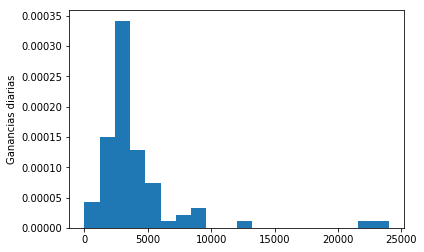

In [126]:
x = serie_youtube_daily_earnings.values
plt.hist(x, density=True, bins=20)
plt.ylabel('Ganancias diarias');

# Histograma para las ganancias mensuales

In [127]:
serie_youtube_monthly_earnings = df_youtube['earnings_monthly'].fillna(0)

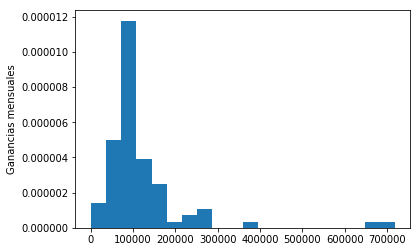

In [128]:
x = serie_youtube_monthly_earnings.values
plt.hist(x, density=True, bins=20)
plt.ylabel('Ganancias mensuales');

# YouTube: Obtener las ganancias por categoria

In [130]:
df_youtube = complete[complete['origen'] == 'YouTube']

In [131]:
categories_vs_earnings_daily = df_youtube.loc[:, ['category', 'earnings_daily']]
count_earnings_daily = categories_vs_earnings_daily.groupby(['category']).sum()
count_earnings_daily

,earnings_daily
category,
Comedy,5300.0
Education,36400.0
Entertainment,92600.0
Film,14400.0
Games,4900.0
Howto,4600.0
Music,105200.0
People,22600.0
Tech,1600.0


In [132]:
count_earnings_daily['earnings_daily'].keys()

Index(['Comedy', 'Education', 'Entertainment', 'Film', 'Games', 'Howto',
       'Music', 'People', 'Tech'],
      dtype='object', name='category')

In [133]:
count_earnings_daily['earnings_daily'].values

array([  5300.,  36400.,  92600.,  14400.,   4900.,   4600., 105200.,
        22600.,   1600.])

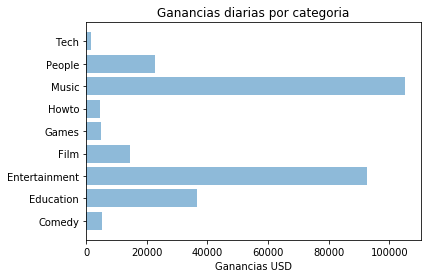

In [134]:
objects = count_earnings_daily['earnings_daily'].keys()
y_pos = np.arange(len(objects))
performance = count_earnings_daily['earnings_daily'].values
 
plt.barh(y_pos, performance, align='center', alpha=0.5)
plt.yticks(y_pos, objects)
plt.xlabel('Ganancias USD')
plt.title('Ganancias diarias por categoria')
 
plt.show()

# YouTube: Obtener las subcripciones mensuales por categoria

In [136]:
df_youtube = complete[complete['origen'] == 'YouTube']
categories_vs_subs = df_youtube.loc[:, ['category', 'subscribers_monthly']]
count_subs = categories_vs_subs.groupby(['category']).sum()
count_subs

,subscribers_monthly
category,
Comedy,4696064
Education,8003318
Entertainment,15657085
Film,1451258
Games,1043432
Howto,2431594
Music,24024272
People,6874077
Tech,0


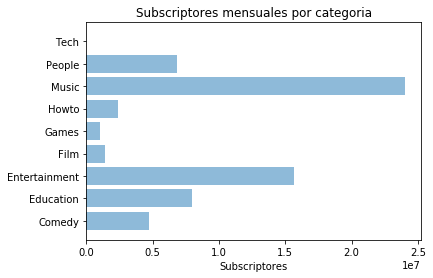

In [137]:
objects = count_subs['subscribers_monthly'].keys()
y_pos = np.arange(len(objects))
performance = count_subs['subscribers_monthly'].values
 
plt.barh(y_pos, performance, align='center', alpha=0.5)
plt.yticks(y_pos, objects)
plt.xlabel('Subscriptores')
plt.title('Subscriptores mensuales por categoria')
 
plt.show()

# YouTube, Twitch, Twitter, Instagram: Obtener las subcripciones diarias en cada plataforma

In [139]:
categories_vs_subs = complete.loc[:, ['origen', 'subscribers_daily']]
count_subs = categories_vs_subs.groupby(['origen']).sum()
count_subs

,subscribers_daily
origen,
Instagram,2816024
Twitch,154530
Twitter,409811
YouTube,2496576


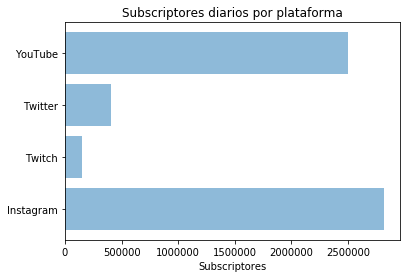

In [140]:
objects = count_subs['subscribers_daily'].keys()
y_pos = np.arange(len(objects))
performance = count_subs['subscribers_daily'].values
 
plt.barh(y_pos, performance, align='center', alpha=0.5)
plt.yticks(y_pos, objects)
plt.xlabel('Subscriptores')
plt.title('Subscriptores diarios por plataforma')
 
plt.show()